# Extraordinario_ Simulación de Montecarlo de Precios

## a) Descargue datos históricos de Facebook (del 1 de julio del 2021 al 30 de abril del 2022) de Yahoo Finanzas, guárdelos en un DataFrame de pandas e imprimael encabezado, grafique los rendimientos y determine el rendimiento promedio.

In [1]:
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternativa
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Usamos *yfinance* para descargar datos de yahoo finance

In [8]:
pip install yfinance

  Created wheel for multitasking: filename=multitasking-0.0.10-py3-none-any.whl size=8500 sha256=dfe4afe675b0bd106bb10cf4cc6e198d19d89c2bf12a907eb6f4f8b8f5178362
  Stored in directory: c:\users\casti\appdata\local\pip\cache\wheels\f2\b5\2c\59ba95dcf854e542944c75fe3da584e4e3833b319735a0546c
Successfully built multitasking
Note: you may need to restart the kernel to use updated packages.


In [9]:
import numpy as np
import pandas as pd
import yfinance as yf

Definimos los parametros de los datos, se quiere obtener las acciones de Facebook.

In [33]:
RISKY_ASSET = 'FB'
START_DATE = '2021-07-01'
END_DATE = '2022-04-30'

Cargamos la base en un DataFrame de pandas

In [34]:
df = yf.download(RISKY_ASSET, start=START_DATE, end=END_DATE, adjusted=True)
print(f'Descargados {df.shape[0]} renglones de datos.')

[*********************100%***********************]  1 of 1 completed
Descargados 210 renglones de datos.


Imprimimos los primeros 5 y las últimas 5 renglones

In [35]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-01,346.820007,354.669891,346.500000,354.390015,354.390015,17137021
2021-07-02,355.100006,356.440002,352.619995,354.700012,354.700012,11524614
2021-07-06,356.500000,358.790009,349.179993,352.779999,352.779999,13488455
2021-07-07,355.260010,356.489990,350.000000,350.489990,350.489990,14218866
2021-07-08,345.730011,348.329987,342.559998,345.649994,345.649994,14406457
...,...,...,...,...,...,...
2022-04-25,182.729996,187.179993,181.654999,186.990005,186.990005,29281060
2022-04-26,186.630005,187.184998,179.500000,180.949997,180.949997,31747434
2022-04-27,174.429993,181.209900,169.000000,174.949997,174.949997,71062886


Calculamos los rendimientos diarios  y **los graficamos.**
Usamos los métodos:

* **dropna()**, que filtrar los valores de una estructura de datos pandas para dejar solo aquellos no nulos.

* **pct_change()**, que calcula el porcentaje de cambio entre la entrada actual y la anterior

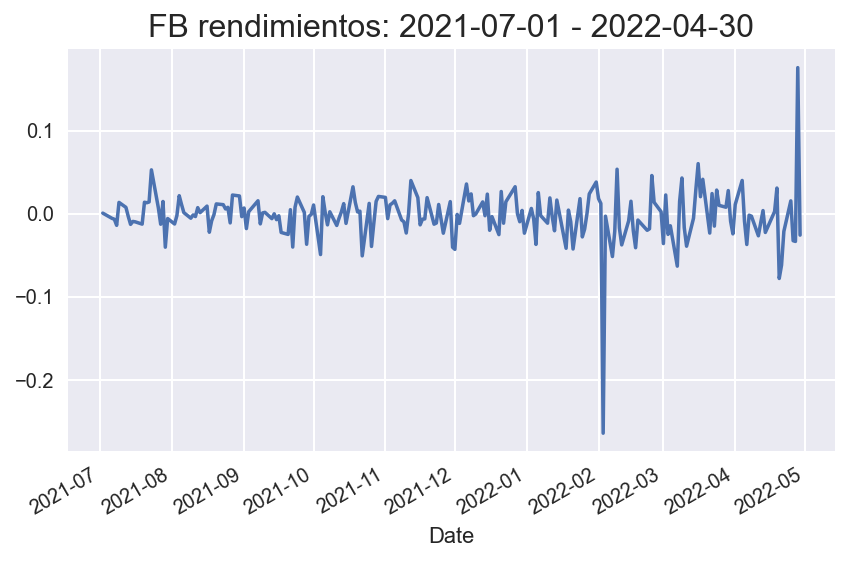

Rendimiento promedio: -0.22%


In [36]:
adj_close = df['Adj Close']
returns = adj_close.pct_change().dropna()   

ax = returns.plot()
ax.set_title(f'{RISKY_ASSET} rendimientos: {START_DATE} - {END_DATE}', 
             fontsize=16)


plt.tight_layout()
#plt.savefig('imagen1.png')
plt.show()

print(f'Rendimiento promedio: {100 * returns.mean():.2f}%')

## b) Realizamos las pruebas para determinar si los rendimientos siguen un movimiento browniano.

Por teoría, siguen un movimiento browniano **si siguen una distribución normal.**

Graficamos el histograma para darnos una idea de si realmente siguen una distribución normal o no.

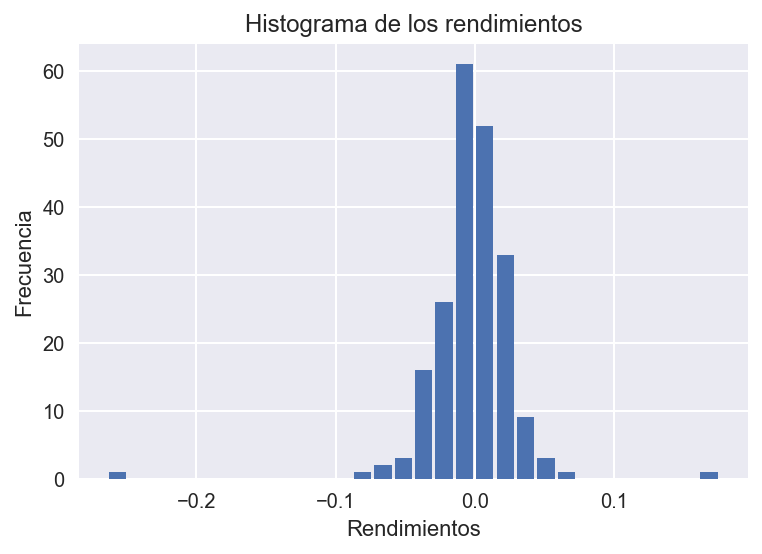

In [37]:
plt.hist(x=returns, rwidth=0.85, bins=30)
plt.title('Histograma de los rendimientos')
plt.xlabel('Rendimientos')
plt.ylabel('Frecuencia')

plt.show()

En una primera impresión con la gráfica, parece que **sí siguen una distribución normal**

C:\Users\casti\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


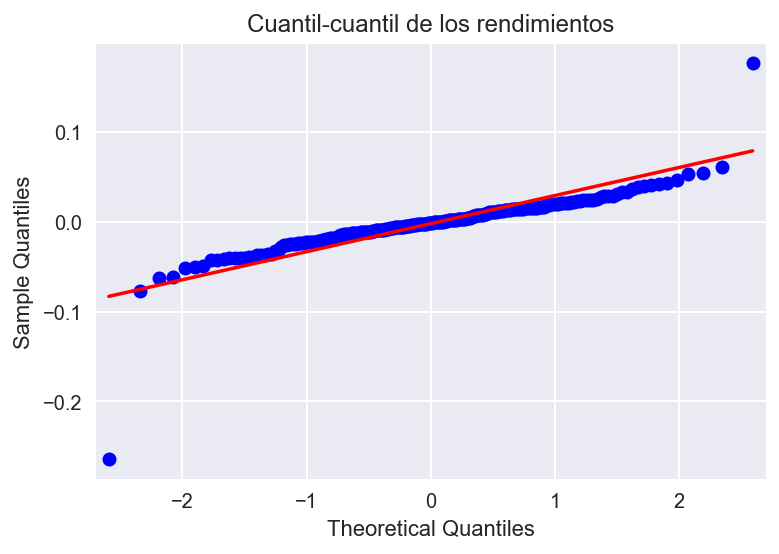

In [38]:
from statsmodels.graphics.gofplots import qqplot
qqplot(returns, line='s')
plt.title('Cuantil-cuantil de los rendimientos')
plt.show()


Igual, parece ser que sí siguen una distribución normal.

**Ahora el test de Kolmogorov**

In [39]:
from scipy.stats import kstest
kstest(returns, 'norm', args=(mu, sigma))

KstestResult(statistic=0.0862551814232102, pvalue=0.0840560766182401)

Nivel de confianza
Este valor opcional restablece el nivel de intervalo de confianza que estima la prueba de Kolmogorov-Smirnov cuando se utilizan las simulaciones de Monte Carlo. El valor debe estar comprendido entre 0 y 100. El valor predeterminado es 99.

## c) Divida el conjunto de Datos en un 70% para entrenamiento y 30% de prueba. Del conjunto de entrenamiento determine *mu* y *sigma*, y úselos para predecir el precio conjunto de prueba. Grafique el resultado.

Total de días del 01 de julio al 30 de abril: 304 días 
304 --> 100%
212.8 --> 70%
Por tanto, 213 días serán aprox mi 70%

transcurridos 213, que sería del 01 de julio 2021 al 29 de enero 2022

In [55]:
train = returns['2021-07-01':'2022-01-29']   # 70% de los datos
test = returns['2022-01-30':'2022-04-30']    # 30% de los datos

Se definen los parámetros de la Simulación

In [56]:
T = len(test)   # longitud del periodo de predicción
N = len(test)   # número de incrementos unitarios en el periodo de predicción
S_0 = adj_close[train.index[-1]]  # precio inicial
N_SIM = 100

# Obtenemos los parametros del subconjunto de entrenamiento

mu = train.mean()    
sigma = train.std()
print("El valor de mu es: ", mu)
print("El valor de sigma es: ", sigma)

El valor de mu es:  -0.000932091200928386
El valor de sigma es:  0.01842896547395969


In [57]:
mu, sigma

(-0.000932091200928386, 0.01842896547395969)

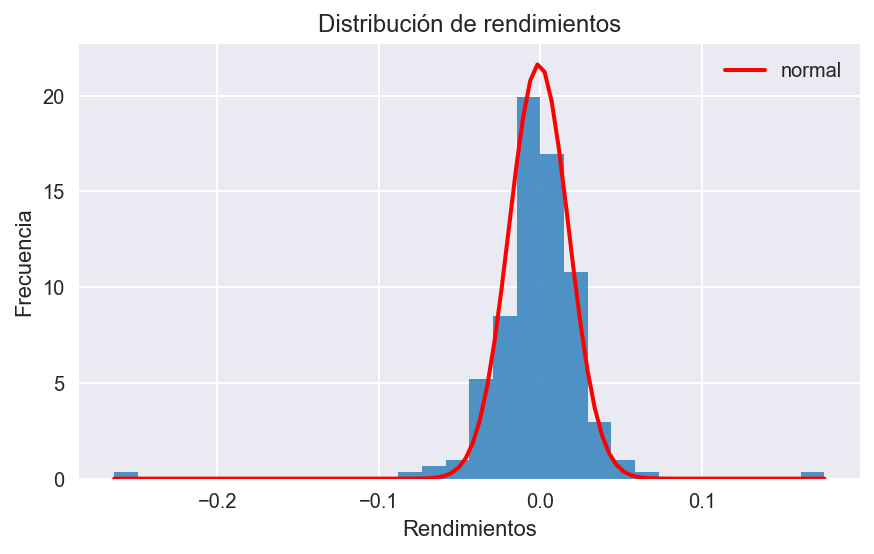

In [58]:
from scipy import stats
x_hat = np.linspace(min(returns), max(returns), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, color='red', label='normal')
ax.hist(x=returns, density=True, bins=30, color="#3182bd", alpha=0.85)
ax.set_title('Distribución de rendimientos')
ax.set_xlabel('Rendimientos')
ax.set_ylabel('Frecuencia')
ax.legend();

In [59]:
def simulate_gbm(s_0, mu, sigma, n_sims, T, N, random_seed=242):

    np.random.seed(random_seed)  # fijamos la semilla
    
    dt = T/N                     # incremento temporal
    dW = np.random.normal(scale = np.sqrt(dt), size=(n_sims, N))
    W = np.cumsum(dW, axis=1)
    
    time_step = np.linspace(dt, T, N)
    time_steps = np.broadcast_to(time_step, (n_sims, N))
    
    S_t = s_0 * np.exp((mu - 0.5 * sigma**2) * time_steps + sigma * W)   # Matriz (n_sim, T+1)
    S_t = np.insert(S_t, 0, s_0, axis=1)                 #Los reglones son trayectorias , columnas son tiempo
    
    return S_t

Se corre la simulación

In [60]:
gbm_simulations = simulate_gbm(S_0, mu, sigma, N_SIM, T, N)
gbm_simulations

array([[301.70999146, 299.39855494, 299.88812279, ..., 338.83210613,
        334.68498245, 331.44001107],
       [301.70999146, 305.63512653, 305.10593139, ..., 262.75587504,
        266.88956837, 267.90847691],
       [301.70999146, 284.14019347, 279.60242534, ..., 293.54089006,
        295.34607792, 293.58134035],
       ...,
       [301.70999146, 309.31219621, 308.9735682 , ..., 344.83653939,
        333.65848784, 345.06381504],
       [301.70999146, 297.5600858 , 297.97213461, ..., 280.11637037,
        277.63024934, 274.78768391],
       [301.70999146, 303.03973152, 296.63183172, ..., 346.0542956 ,
        352.32336166, 339.18384552]])

Se grafican los resultados:

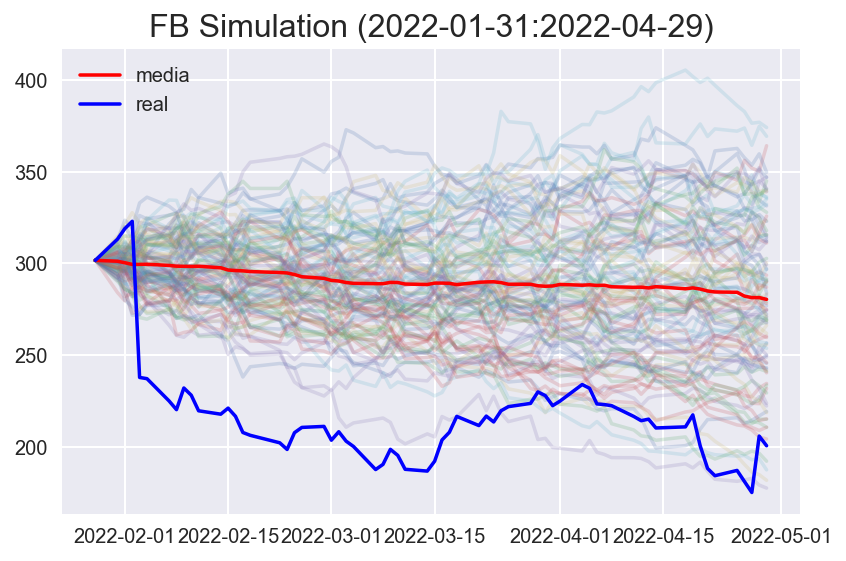

In [61]:
last_train_date = train.index[-1].date()
first_test_date = test.index[0].date()
last_test_date = test.index[-1].date()
plot_title = (f'{RISKY_ASSET} Simulation 'f'({first_test_date}:{last_test_date})')

selected_indices = adj_close[last_train_date:last_test_date].index
index = [date.date() for date in selected_indices]

gbm_simulations_df = pd.DataFrame(np.transpose(gbm_simulations),   # se ponen datos simulados en un DF para visualizarlos
                                  index=index)

# Grafica
ax = gbm_simulations_df.plot(alpha=0.2, legend=False) # alpha hace transparentes las lineas
line_1, = ax.plot(index, gbm_simulations_df.mean(axis=1), 
                  color='red')
line_2, = ax.plot(index, adj_close[last_train_date:last_test_date], 
                  color='blue')
ax.set_title(plot_title, fontsize=16)
ax.legend((line_1, line_2), ('media', 'real'))

plt.tight_layout()
#plt.savefig('imagen2.png')
plt.show()

## d) Repita el procedimiento para una partición entrenamiento-prueba del 80-20% 
Total de días del 01 de julio al 30 de abril: 304 días 
304 --> 100%
243.2 --> 80%
Por tanto, 243 días serán aprox mi 80% 

Transcurridos 243, del 01 de julio 2021 al 28 de febrero 2022.

In [62]:
train = returns['2021-07-01':'2022-02-28']   # 80% de los datos
test = returns['2022-03-01':'2022-04-30']    # 20% de los datos

Se definen los parámetros de la Simulación

In [63]:
T = len(test)   # longitud del periodo de predicción
N = len(test)   # número de incrementos unitarios en el periodo de predicción
S_0 = adj_close[train.index[-1]]  # precio inicial
N_SIM = 100

# Obtenemos los parametros del subconjunto de entrenamiento

mu = train.mean()    
sigma = train.std()

print("El valor de mu es: ", mu)
print("El valor de sigma es: ", sigma)

El valor de mu es:  -0.002671842222266897
El valor de sigma es:  0.02838157258383417


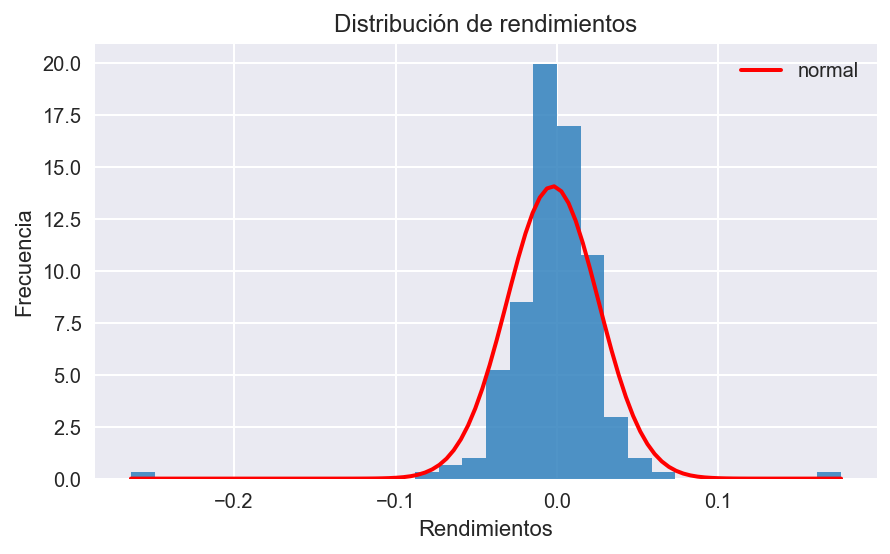

In [64]:
from scipy import stats
x_hat = np.linspace(min(returns), max(returns), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, color='red', label='normal')
ax.hist(x=returns, density=True, bins=30, color="#3182bd", alpha=0.85)
ax.set_title('Distribución de rendimientos')
ax.set_xlabel('Rendimientos')
ax.set_ylabel('Frecuencia')
ax.legend();

In [65]:
def simulate_gbm(s_0, mu, sigma, n_sims, T, N, random_seed=242):

    np.random.seed(random_seed)  # fijamos la semilla
    
    dt = T/N                     # incremento temporal
    dW = np.random.normal(scale = np.sqrt(dt), size=(n_sims, N))
    W = np.cumsum(dW, axis=1)
    
    time_step = np.linspace(dt, T, N)
    time_steps = np.broadcast_to(time_step, (n_sims, N))
    
    S_t = s_0 * np.exp((mu - 0.5 * sigma**2) * time_steps + sigma * W)   # Matriz (n_sim, T+1)
    S_t = np.insert(S_t, 0, s_0, axis=1)                 #Los reglones son trayectorias , columnas son tiempo
    
    return S_t

In [66]:
gbm_simulations = simulate_gbm(S_0, mu, sigma, N_SIM, T, N)
gbm_simulations

array([[211.02999878, 208.2582166 , 208.49547116, ..., 234.02383329,
        224.42827055, 223.61733292],
       [211.02999878, 223.05346125, 228.55118639, ..., 182.9424296 ,
        180.74914522, 178.77472737],
       [211.02999878, 215.40300097, 213.59382755, ..., 173.17899451,
        168.70551651, 175.15020584],
       ...,
       [211.02999878, 216.5107528 , 212.86366342, ..., 229.58051834,
        226.87731798, 220.50510145],
       [211.02999878, 203.09047055, 215.68721954, ..., 165.70179266,
        164.75387357, 170.37856816],
       [211.02999878, 212.12471157, 209.25780953, ..., 120.38161204,
        121.70295518, 120.70803052]])

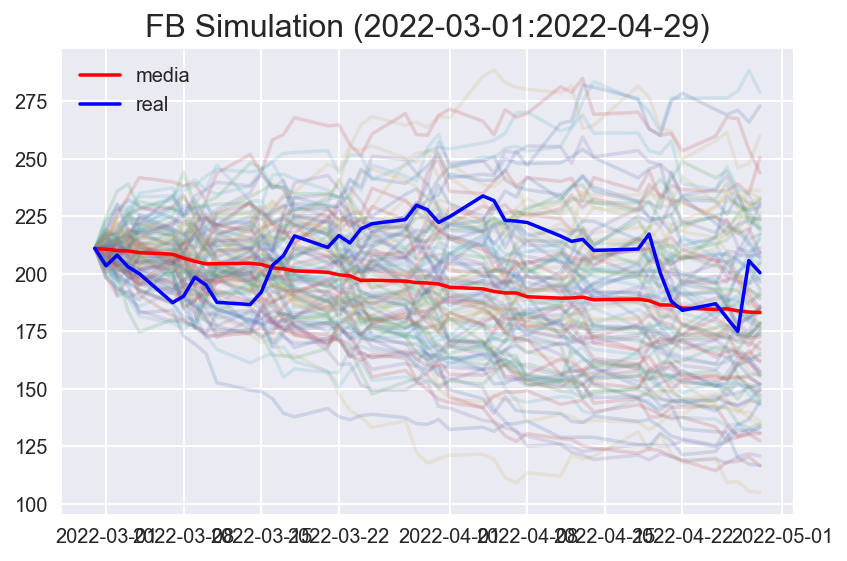

In [67]:
#Graficando los resultados 
last_train_date = train.index[-1].date()
first_test_date = test.index[0].date()
last_test_date = test.index[-1].date()
plot_title = (f'{RISKY_ASSET} Simulation 'f'({first_test_date}:{last_test_date})')

selected_indices = adj_close[last_train_date:last_test_date].index
index = [date.date() for date in selected_indices]

gbm_simulations_df = pd.DataFrame(np.transpose(gbm_simulations),   # se ponen datos simulados en un DF para visualizarlos
                                  index=index)

# Grafica
ax = gbm_simulations_df.plot(alpha=0.2, legend=False) # alpha hace transparentes las lineas
line_1, = ax.plot(index, gbm_simulations_df.mean(axis=1), 
                  color='red')
line_2, = ax.plot(index, adj_close[last_train_date:last_test_date], 
                  color='blue')
ax.set_title(plot_title, fontsize=16)
ax.legend((line_1, line_2), ('media', 'real'))

plt.tight_layout()
#plt.savefig('imagen2.png')
plt.show()

## e) Repita para una partición 90%-10% y elabore  algunas conclusiones a partir de las gráficas.
Total de días del 01 de julio al 30 de abril: 304 días 
304 --> 100%
273.6 --> 90%.

Por tanto, 274 días serán aprox mi 90% 

Transcurridos 274, del 01 de julio 2021 al 31 de marzo 2022.

In [68]:
train = returns['2021-07-01':'2022-03-31']   # 80% de los datos
test = returns['2022-04-01':'2022-04-30']    # 20% de los datos

Establecemos los parámetros de la Simulación

In [69]:
T = len(test)   # longitud del periodo de predicción
N = len(test)   # número de incrementos unitarios en el periodo de predicción
S_0 = adj_close[train.index[-1]]  # precio inicial
N_SIM = 100

# Obtenemos los parametros del subconjunto de entrenamiento

mu = train.mean()    
sigma = train.std()

print("El valor de mu es: ", mu)
print("El valor de sigma es: ", sigma)

El valor de mu es:  -0.0020147872513533852
El valor de sigma es:  0.02864155236849238


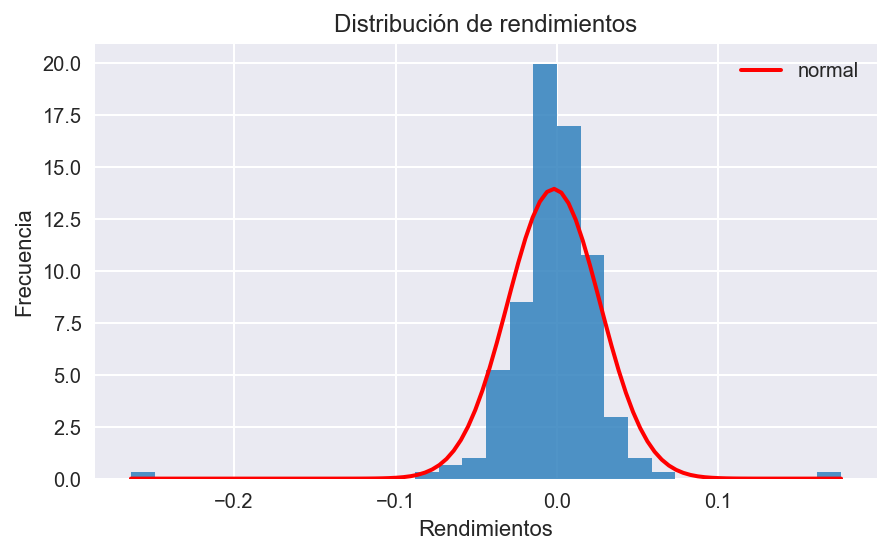

In [70]:
from scipy import stats
x_hat = np.linspace(min(returns), max(returns), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, color='red', label='normal')
ax.hist(x=returns, density=True, bins=30, color="#3182bd", alpha=0.85)
ax.set_title('Distribución de rendimientos')
ax.set_xlabel('Rendimientos')
ax.set_ylabel('Frecuencia')
ax.legend();

In [71]:
def simulate_gbm(s_0, mu, sigma, n_sims, T, N, random_seed=242):

    np.random.seed(random_seed)  # fijamos la semilla
    
    dt = T/N                     # incremento temporal
    dW = np.random.normal(scale = np.sqrt(dt), size=(n_sims, N))
    W = np.cumsum(dW, axis=1)
    
    time_step = np.linspace(dt, T, N)
    time_steps = np.broadcast_to(time_step, (n_sims, N))
    
    S_t = s_0 * np.exp((mu - 0.5 * sigma**2) * time_steps + sigma * W)   # Matriz (n_sim, T+1)
    S_t = np.insert(S_t, 0, s_0, axis=1)                 #Los reglones son trayectorias , columnas son tiempo
    
    return S_t

In [72]:
gbm_simulations = simulate_gbm(S_0, mu, sigma, N_SIM, T, N)
gbm_simulations

array([[222.36000061, 219.56159882, 219.96306498, ..., 238.87519828,
        240.27720645, 250.79380372],
       [222.36000061, 224.7630677 , 221.10328786, ..., 222.84724364,
        222.36497823, 216.96013337],
       [222.36000061, 230.60549807, 221.2151896 , ..., 244.21848152,
        254.91444136, 245.26831059],
       ...,
       [222.36000061, 215.05658995, 200.50150706, ..., 208.09220664,
        188.10421288, 186.98847268],
       [222.36000061, 232.3711711 , 244.92321254, ..., 199.60551025,
        190.4532501 , 202.15534647],
       [222.36000061, 222.63340471, 231.93925058, ..., 227.19694748,
        239.22091667, 233.68953872]])

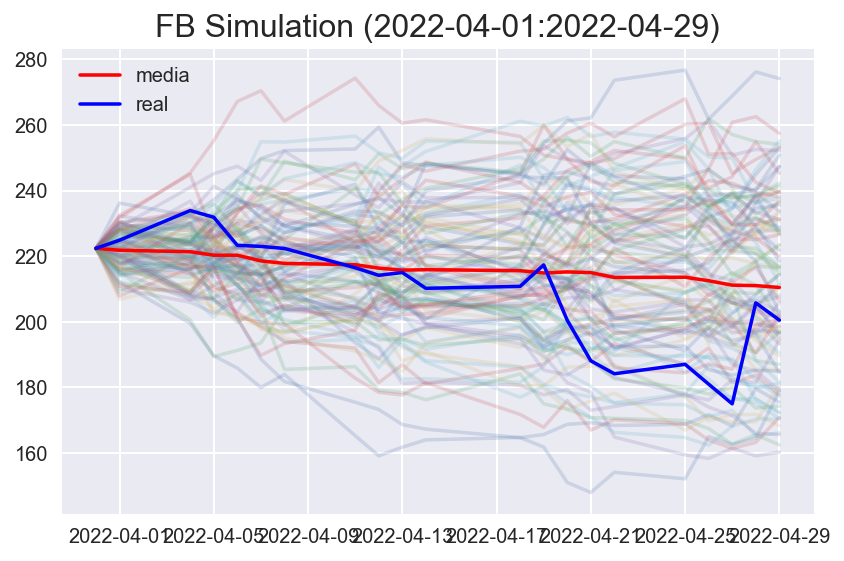

In [73]:
#Graficando los resultados 
last_train_date = train.index[-1].date()
first_test_date = test.index[0].date()
last_test_date = test.index[-1].date()
plot_title = (f'{RISKY_ASSET} Simulation 'f'({first_test_date}:{last_test_date})')

selected_indices = adj_close[last_train_date:last_test_date].index
index = [date.date() for date in selected_indices]

gbm_simulations_df = pd.DataFrame(np.transpose(gbm_simulations),   # se ponen datos simulados en un DF para visualizarlos
                                  index=index)

# Grafica
ax = gbm_simulations_df.plot(alpha=0.2, legend=False) # alpha hace transparentes las lineas
line_1, = ax.plot(index, gbm_simulations_df.mean(axis=1), 
                  color='red')
line_2, = ax.plot(index, adj_close[last_train_date:last_test_date], 
                  color='blue')
ax.set_title(plot_title, fontsize=16)
ax.legend((line_1, line_2), ('media', 'real'))

plt.tight_layout()
#plt.savefig('imagen2.png')
plt.show()

# Conclusiones

La simulación por el método Montecarlo predice un conjunto de resultados con base en un rango estimado de valores frente a un conjunto de valores de entrada fijos. En otras palabras, una simulación de Monte Carlo crea un modelo de posibles resultados aprovechando una distribución de probabilidades, como una distribución uniforme o normal, para cualquier variable que tenga una incertidumbre inherente.

Es importante señalar que mientras más muestras Recordar que, entre más muestras, mejor resultado se obtiene.
El método MC usa un proceso de discretización para simular fenómenos continuos.
Aquí se trabaja con vectores, lo cual evita bucles tipo for, que pueden ser ineficientes para este tipo de simulaciones.

**Observaciones de las gráficas** 
* En la partición del 70% y 30% para entrenamiento y prueba respectivamente, se observa una mayor variación en los precios reales respecto a la media, en comparación con la partición del 90% - 10%. Seguramente debido al corto tiempo de prueba.
* Los datos graficados en el histograma parecen seguir una distribución normal, sin embargo, con algunos valores de sigma y mu se puede ver que sale un poco de la campana gaussiana formada. 
* Las simulaciones de Monte Carlo hacen predicciones a largo plazo debido a su precisión. A medida que aumenta el número de entradas, el número de predicciones también crece, lo que le permite proyectar los resultados más lejos en el tiempo con una mayor precisión. 